In [7]:
from datafusion import SessionContext
import polars as pl

pl.Config.set_fmt_str_lengths(1000)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

file = "data/foo.parquet"
ctx = SessionContext()
ctx.register_parquet("t", file)
df = ctx.sql("select * from t limit 10")
# df = ctx.sql("select * exclude(data_val) \
#              from t \
#              order by image_name")
print(df.schema())
df = df.to_polars()
df

id: int32 not null
name: string


id,name
i32,str
1,"""foo"""
2,"""bar"""
3,"""baz"""


In [2]:
import polars as pl

# pl.Config.restore_defaults()
pl.Config.set_fmt_str_lengths(1000)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

file = "data/foo.parquet"
df = pl.scan_parquet(file)
# df.schema
context = pl.SQLContext(frame=df)
query = """
    select *
    from frame
    limit 10
    """
context.execute(query).collect()

OrderedDict([('pkey_new', Utf8),
             ('pkey', Utf8),
             ('image_name', Utf8),
             ('order_id', Utf8),
             ('data_val', Binary),
             ('data_val_half', Binary),
             ('image_type', Utf8),
             ('colorspace', Utf8),
             ('encoding_type', Utf8),
             ('camera_id', Int32),
             ('scan_id', Int32),
             ('jaw', Utf8),
             ('image_source', Utf8),
             ('description', Utf8),
             ('metadata', Utf8)])

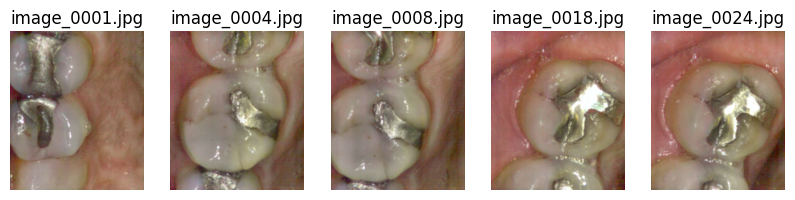

In [16]:
import polars as pl
import matplotlib.pylab as plt
from PIL import Image
import io

pl.Config.set_fmt_str_lengths(1000)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

file = "data/foo.parquet"
df = pl.scan_parquet(file)
context = pl.SQLContext(frame=df)
query = """
    select *
    from frame
    limit 10
    """
res = context.execute(query).collect()
# print(res)
# image_data = res['data_val'][0]
# img = Image.open(io.BytesIO(image_data))
# img.show()

fig, axs = plt.subplots(1, 5, figsize=(10, 5))
for i in range(len(axs)):
    axs[i].imshow(Image.open(io.BytesIO(res['data_val'][i])))
    axs[i].imshow(Image.open(io.BytesIO(res['data_val'][i])))
    axs[i].imshow(Image.open(io.BytesIO(res['data_val'][i])))
    axs[i].set_title(res['image_name'][i])
    axs[i].set_title(res['image_name'][i])
    axs[i].set_title(res['image_name'][i])
    axs[i].axis('off')

plt.show()

In [6]:
import polars as pl

pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

file = "./data/foo.parquet"
df = pl.scan_parquet(file)
df = df.collect()
df.sample(10)

pkey,image_name,order_id,data_val,data_val_half,image_type,colorspace,encoding_type
str,str,str,binary,binary,str,str,str
"""4oHykfUJ9QlaSxpkOwC9iNuS3wL3APMjtpOP4oPl08M""","""image_0548.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""4GPwzLAcsAnwKeAD4ALGet0P0QnQDsEBwMHAzc0NxQk""","""image_0484.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""mjucZZjNQJqzHKZJxjmWOZw1eDJyMwNDKE9hb+REp8Q""","""image_0854.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""w8nfyZ/L/cTZ4fPwt/ifcR9xP/Fe8/nz7eGe59bn1mE""","""image_0592.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""8pP3C/WZWksaZjogO4jfkt8S9wH3IbSTj+OD5ZPD18k""","""image_0551.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""mL8Y/tjyyIDEMczxhMeGw8ZDjIOY8jiM4A7ALMHbm9M""","""image_0883.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""YMPKwtJA8I/4hGaD5svEzNhA2AfyEfoC2IPwsMg45gM""","""image_1051.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""yjjDOvVs81j72Ltz92P2Y/YHxyHGZ83D25PSm9bD1B8""","""image_0895.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""
"""YeZwxjDGXm5XPrcs30y7bPEkwfj4MDDmA+cLozt2M2U""","""image_0908.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg"""


In [18]:
import polars as pl

pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

file = "./data/foo.parquet"
df = pl.scan_parquet(file)
# df = df.with_columns([
#     pl.col('data_val').cast(pl.Utf8).alias("data_val_content")
# ])
# df.schema
# df.collect().head(10)
df = df.with_columns([
    pl.col('metadata').str.json_path_match(r"$.create_time").alias('create_time'),
    pl.col('metadata').str.json_path_match(r"$.position_weight").alias('position_weight'),
    # pl.col('metadata').str.json_path_match(r"$.create_time").alias('create_time'),
])
context = pl.SQLContext(frame=df)
query = """
    select *
    from frame
    limit 10
    """
context.execute(query).collect()

id,pkey,image_name,order_id,data_val,data_val_half,image_type,colorspace,encoding_type,camera_id,scan_id,jaw,image_source,description,metadata,create_time,position_weight
i32,str,str,str,binary,binary,str,str,str,i32,i32,str,str,str,str,str,str
1,"""xSbNJGykbbRtlG2Sb1NLHjk8cWxxTHEuaRqHDE88Rzo""","""image_0001.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":328736.0,""local_to_world_tx"":""[0.908062, -0.404415, -0.108958, 0.000000, -0.368015, …","""328736.0""","""1.0"""
4,"""Dp+MlxxmcCO8Yx5HjsaOG6ZRB2FDI7anlgPZaBNJZ2k""","""image_0004.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":329328.5,""local_to_world_tx"":""[0.866481, -0.452479, -0.210889, 0.000000, -0.394707, …","""329328.5""","""10.0"""
8,"""EzHDJcM3xxjODP4IxxGjEaMT6ZRJmNkIyanNmBeaxtI""","""image_0008.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":329802.0,""local_to_world_tx"":""[0.871221, -0.434866, -0.227741, 0.000000, -0.374676, …","""329802.0""","""10.0"""
18,"""hseGj2D/6jHrMXVMdw87BziWOBY4H28N42ceIz8HHwU""","""image_0018.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":330986.0,""local_to_world_tx"":""[0.723293, -0.589719, -0.359274, 0.000000, -0.531143, …","""330986.0""","""10.0"""
24,"""gifiJ5D/02j2Gfs0K04diz2bPUOaC5sF8YHP0Y/Dz+M""","""image_0024.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":331696.0,""local_to_world_tx"":""[0.625906, -0.617858, -0.475913, 0.000000, -0.539655, …","""331696.0""","""10.0"""
25,"""gzfgI5p/82j2GHs0KUaNyx3JHUubC5sE8YHHwY/Dz2M""","""image_0025.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":331814.5,""local_to_world_tx"":""[0.623544, -0.611543, -0.487040, 0.000000, -0.530853, …","""331814.5""","""10.0"""
30,"""gzPBc9h/+sx6nBkmncOOyY7hDkPOR1sj8RGPkY+RT4I""","""image_0030.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":332406.0,""local_to_world_tx"":""[0.720772, -0.586727, -0.369106, 0.000000, -0.523846, …","""332406.0""","""10.0"""
42,"""GOE04UzgzHGEcMx4TDhMnAGcDo5K7kHvI7sRu8k/yb8""","""image_0042.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":333826.5,""local_to_world_tx"":""[0.767768, -0.536536, -0.350231, 0.000000, -0.516053, …","""333826.5""","""10.0"""
47,"""wYjbiB7EZOHm8JbyErMbuQu5Lb1x/TN8I34jrjOfOZ8""","""image_0047.jpg""","""2021-04-27T10-11-22-01AMHMC""",[binary data],null,"""wl""","""srgb""","""jpg""",null,null,"""upper""",null,null,"""{""create_time"":335602.5,""local_to_world_tx"":""[0.678876, -0.623545, -0.387710, 0.000000, -0.633337, …","""335602.5""","""1.0"""


In [32]:
import polars as pl

pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)
# pl.Config.set_tbl_hide_dataframe_shape(False) 

file = "./data/eda_data.csv"

# df = pl.read_csv(file)
lf = pl.scan_csv(file)
lf = lf.select(
    (pl.col("Job Title")).alias("job_title"),
    (pl.col("job_simp")),
    (pl.col("Salary Estimate")).alias("salary"),
    (pl.col("Company Name")).alias("company"),
    (pl.col("avg_salary"))
)

context = pl.SQLContext(frame=lf)
query = """
    select * 
    from frame 
    where job_simp = 'data engineer'
    order by avg_salary desc
    limit 10
    """
context.execute(query).collect()

job_title,job_simp,salary,company,avg_salary
str,str,str,str,f64
"""Lead Data Engineer""","""data engineer""","""$190K-$220K(Employer est.)""","""Credit Sesame 4.1""",205.0
"""Lead Data Engineer""","""data engineer""","""$190K-$220K(Employer est.)""","""Credit Sesame 4.1""",205.0
"""Lead Data Engineer""","""data engineer""","""$190K-$220K(Employer est.)""","""Credit Sesame 4.1""",205.0
"""Staff Data Engineer""","""data engineer""","""$126K-$228K (Glassdoor est.)""","""Samsung Research America 3.7""",177.0
"""Principal Data Engineer, Data Platform & Insights""","""data engineer""","""$116K-$209K (Glassdoor est.)""","""Autodesk 4.0""",162.5
"""Lead Big Data Engineer""","""data engineer""","""$121K-$203K (Glassdoor est.)""","""Glassdoor 4.0""",162.0
"""Lead Big Data Engineer""","""data engineer""","""$121K-$203K (Glassdoor est.)""","""Glassdoor 4.0""",162.0
"""Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence""","""data engineer""","""$113K-$196K (Glassdoor est.)""","""Takeda Pharmaceuticals 3.7""",154.5
"""Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence""","""data engineer""","""$113K-$196K (Glassdoor est.)""","""Takeda Pharmaceuticals 3.7""",154.5


In [54]:
import polars as pl

file = "s3://bucket/foo.parquet"
df = pl.read_parquet(file)
df.head(10)

pkey,image_name,order_id,data_val,data_val_half,image_type,colorspace,encoding_type
str,str,str,str,str,str,str,str
"""zSRspGy0bJRtmm8TSxp5PHkscUxxTEkeDxzPPEc8R+Y""","""image_0000.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""xSbNJGykbbRtlG2Sb1NLHjk8cWxxTHEuaRqHDE88Rzo""","""image_0001.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""foQsj5vJ2UjRKNMo2yzehpcsczjz2OPY4xyfPA4djnw""","""image_0002.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""Ocs8jBydbKduw4bCJ8bNRr8hs5lvtm6wRoNOY0wzVjs""","""image_0003.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""Dp+MlxxmcCO8Yx5HjsaOG6ZRB2FDI7anlgPZaBNJZ2k""","""image_0004.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""DoWMl5xHeDPwM55jjkaPRocZgyFDMYMhlgNuIRkkMyU""","""image_0005.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""zswO1Q7XDEMcM/IzniOOR89Gh0mDIQMhgyVXQ14hSWQ""","""image_0006.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""bsaO10ZLDCO6M94jjmNPR8dO0yiLIcMxw4NWYU1kG2U""","""image_0007.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""
"""EzHDJcM3xxjODP4IxxGjEaMT6ZRJmNkIyanNmBeaxtI""","""image_0008.jpg""","""2021-04-27T10-11-22-01AMHMC""","""foo""","""bar""","""wl""","""srgb""","""jpg"""


In [49]:
import pandas as pd

file = "./data/foo.parquet"
df = pd.read_parquet(file)
df.head()

OSError: Couldn't deserialize thrift: TProtocolException: Invalid data
Deserializing page header failed.


In [10]:
import duckdb

duckdb.sql(
    """
    select *
    from 'data/foo.parquet'
    limit 10
    """
)

┌──────────────────────┬──────────────────────┬────────────────┬───┬──────────────┬─────────────┬──────────────────────┐
│       pkey_new       │         pkey         │   image_name   │ … │ image_source │ description │       metadata       │
│       varchar        │       varchar        │    varchar     │   │   varchar    │   varchar   │       varchar        │
├──────────────────────┼──────────────────────┼────────────────┼───┼──────────────┼─────────────┼──────────────────────┤
│ d2b4a96aa7f5d685b9…  │ zf/Hvaf1N+S38PfZ8+…  │ image_0000.jpg │ … │ NULL         │ NULL        │ {"create_time":144…  │
│ c2b02d6a2fdef0913c…  │ AAAOAA4AHwB/AH+Cf4…  │ image_0000.jpg │ … │ NULL         │ NULL        │ {"create_time":145…  │
│ 94a1a952b7a5d60fb9…  │ +f/Pv++5b+134ffx95…  │ image_0001.jpg │ … │ NULL         │ NULL        │ {"create_time":145…  │
│ 94a1a952b6a5d40fb9…  │ +fvPv8+5b+1n5fdx95…  │ image_0002.jpg │ … │ NULL         │ NULL        │ {"create_time":146…  │
│ 94a1a952b6a5d40fb9…  │ +/vLv8/

In [12]:
import pyarrow.parquet as pq

file = "./data/foo.parquet"
df = pq.read_table(file)
# df
df.to_pandas().head(5)

,pkey_new,pkey,image_name,order_id,data_val,data_val_half,image_type,colorspace,encoding_type,camera_id,scan_id,jaw,image_source,description,metadata
0,d2b4a96aa7f5d685b94aa5a49a165e1f6958b621e2529f...,zf/Hvaf1N+S38PfZ8+PniPOAm8Y7jh3KHck9yzjL5sg,image_0000.jpg,2021-05-04T10-07-18-RL004HMC,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,wl,srgb,jpg,NaN,NaN,upper,None,None,"{""create_time"":14461.0,""local_to_world_tx"":""[0..."
1,c2b02d6a2fdef0913c0b93e89e2dcb4e787db4874ad2cf...,AAAOAA4AHwB/AH+Cf4BngDcAH0BvADcBnwEfAN8AfwA,image_0000.jpg,2021-05-04T10-07-18-RL004HMC,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,ir,srgb,jpg,NaN,NaN,upper,None,None,"{""create_time"":14517.0,""local_to_world_tx"":""[0..."
2,94a1a952b7a5d60fb95ea7249a1d4e3825c0b607ca949d...,+f/Pv++5b+134ffx95HnBOcQs4Q7jjmePYo9iziT9Mg,image_0001.jpg,2021-05-04T10-07-18-RL004HMC,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,wl,srgb,jpg,NaN,NaN,upper,None,None,"{""create_time"":14579.5,""local_to_world_tx"":""[0..."
3,94a1a952b6a5d40fb94caf2d1a3c4d70b5c39637cbf08d...,+fvPv8+5b+1n5fdx95HjhucYs4CzjDueOZ49ijmbcIs,image_0002.jpg,2021-05-04T10-07-18-RL004HMC,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,wl,srgb,jpg,NaN,NaN,upper,None,None,"{""create_time"":14697.5,""local_to_world_tx"":""[0..."
4,94a1a952b6a5d40fb95caf2d9a3c4d50b5c396b7cbf089...,+/vLv8/5b+1n7edx95HnhucYs4CzjDueO549mjmbdJs,image_0003.jpg,2021-05-04T10-07-18-RL004HMC,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,wl,srgb,jpg,NaN,NaN,upper,None,None,"{""create_time"":14816.0,""local_to_world_tx"":""[0..."


In [5]:
import polars as pl

pl.Config.set_fmt_str_lengths(1000)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

images = pl.read_csv("data/missing-images.txt", has_header=False, new_columns=["order_id"])
# print(images.head(10))

models = pl.read_csv("data/missing-orders.txt", has_header=False, new_columns=["order_id"])
# print(models.head(10))

missing = images.join(models, on="order_id", how="anti")
missing.head(10)
# missing.shape

order_id
str
"""2023-12-20T09-28-17-205HMC-LD_180"""
